# Collaborative Filtering based Recommendation System_Questios

## About Book Crossing Dataset
###This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

## Objective
This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

Execute the below cell to load the datasets

In [1]:
import pandas as pd

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\neeha\Anaconda3\envs\newenv\lib\site-packages\IPython\core\intera

## Q1 Check no.of records (shape) and features given in each dataset 

In [3]:
books.shape, users.shape, ratings.shape

((271360, 8), (278858, 3), (1149780, 3))

In [4]:
print(books.columns,'\n')
print(users.columns,'\n')
print(ratings.columns,'\n')

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object') 

Index(['userID', 'Location', 'Age'], dtype='object') 

Index(['userID', 'ISBN', 'bookRating'], dtype='object') 



## Q2. Exploring books dataset - 1

In [5]:
books.head(5)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

In [7]:
books.describe().transpose()

,count,unique,top,freq
ISBN,271360,271360,0070506337,1
bookTitle,271360,242135,Selected Poems,27
bookAuthor,271359,102023,Agatha Christie,632
yearOfPublication,271360,202,2002,13903
publisher,271358,16807,Harlequin,7535
imageUrlS,271360,271044,http://images.amazon.com/images/P/078690514X.0...,2
imageUrlM,271360,271044,http://images.amazon.com/images/P/031213214X.0...,2
imageUrlL,271357,271041,http://images.amazon.com/images/P/037348240X.0...,2


### Drop last three columns containing image URLs which will not be required for analysis

In [8]:
books=books[['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher']]

In [9]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

In [10]:
books.get_dtype_counts()

object    5
dtype: int64

In [11]:
books.head(5)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### check the unique values of yearOfPublication

In [12]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

### Check the rows having 'DK Publishing Inc' as yearOfPublication and drop them
### Change the datatype of yearOfPublication to 'int'  -1

In [13]:
books.drop(books[books.yearOfPublication == 'DK Publishing Inc'].index, inplace=True)

In [14]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

# We will need to delete Rows with Gallimard as well as we cannot convert it to int

In [15]:
books.drop(books[books.yearOfPublication == 'Gallimard'].index, inplace=True)

In [16]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [17]:
books.drop(books[books.yearOfPublication == '0'].index, inplace=True)

In [18]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '1997', '2001', '1974', '1968', '1987', '1984', '1988', '1963',
       '1956', '1970', '1985', '1978', '1973', '1980', '19

In [19]:
books['yearOfPublication']=books['yearOfPublication'].astype(int)

In [20]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Check for null vaules and impute them

In [21]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [22]:
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

Dropping all Null Values as we cannot ramdomly assign a <b>Publisher</b> and an <b>Author</b> so we will drop rows with Na values as we have a large enough dataset

In [23]:
#books=books.dropna()
books=books.fillna(value='0')

In [24]:
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

## Q3. Explore Users Dataset

### Age values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by mean and change the datatype to int - 1

In [25]:
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [26]:
users.head(5)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [27]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

In [28]:
users.describe()

,userID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [29]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [30]:
max_age=users['Age'].mean()
min_age=users['Age'].mean()

In [31]:
max_age,min_age

(34.75143370454978, 34.75143370454978)

In [32]:
users['Age']=users['Age'].map(lambda x: max_age if x>90 
     else x)
users['Age']=users['Age'].map(lambda x: min_age if x<5 
     else x)


In [33]:
users['Age'].unique()

array([       nan, 18.       , 17.       , 61.       , 26.       ,
       14.       , 25.       , 19.       , 46.       , 55.       ,
       32.       , 24.       , 20.       , 34.       , 23.       ,
       51.       , 31.       , 21.       , 44.       , 30.       ,
       57.       , 43.       , 37.       , 41.       , 54.       ,
       42.       , 50.       , 39.       , 53.       , 47.       ,
       36.       , 28.       , 35.       , 13.       , 58.       ,
       49.       , 38.       , 45.       , 62.       , 63.       ,
       27.       , 33.       , 29.       , 66.       , 40.       ,
       15.       , 60.       , 34.7514337, 79.       , 22.       ,
       16.       , 65.       , 59.       , 48.       , 72.       ,
       56.       , 67.       , 80.       , 52.       , 69.       ,
       71.       , 73.       , 78.       ,  9.       , 64.       ,
       12.       , 74.       , 75.       , 76.       , 83.       ,
       68.       , 11.       , 77.       , 70.       ,  8.    

In [34]:
users['Age'].fillna(users['Age'].mean(), inplace=True)

In [35]:
users['Age'] =users['Age'].astype(int)

In [36]:
users.describe()# users.dtypes

,userID,Age
count,278858.00000,278858.000000
mean,139429.50000,34.432926
std,80499.51502,10.512758
min,1.00000,5.000000
25%,69715.25000,29.000000
50%,139429.50000,34.000000
75%,209143.75000,35.000000
max,278858.00000,90.000000


In [37]:
users['Age'].unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88], dtype=int64)

In [38]:
users['Age'].isnull().sum()

0

In [39]:
users.dtypes

userID       int64
Location    object
Age          int32
dtype: object

# Max Age has been capped at 90 and Minimum age has been capped at 5 Years, and nan values have been replaced with 34

## Q4. Explore ratings Dataset

In [40]:
ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [41]:
ratings.shape

(1149780, 3)

In [42]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [43]:
ratings['ISBN'].count()

1149780

In [44]:
ratings_filtered=ratings

In [45]:
ratings.dtypes

userID         int64
ISBN          object
bookRating     int64
dtype: object

In [46]:
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userID,1149780.0,140386.395126,80562.277719,2.0,70345.0,141010.0,211028.0,278854.0
bookRating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


### Ratings dataset should have books only which exist in our books dataset. - 1

In [48]:
ratings_filtered=ratings[ratings['ISBN'].isin(books['ISBN'])]

In [60]:
#ratings_filtered=ratings_filtered[(ratings_filtered['ISBN'].isin(books['ISBN'])) & (ratings_filtered['userID'].isin(users['userID']))]

In [50]:
print("Ratings only in our Books Database:",ratings_filtered.shape)

Ratings only in our Books Database: (1029867, 3)


### Ratings dataset should have ratings from users which exist in users dataset.

In [51]:
#ratings_filtered=ratings_filtered[(ratings_filtered['ISBN'].isin(books['ISBN'])) & (ratings_filtered['userID'].isin(users['userID']))]

In [52]:
ratings_filtered=ratings[ratings['userID'].isin(users['userID'])]

In [53]:
print("Ratings for only users in Users Database:",ratings_filtered.shape)

Ratings for only users in Users Database: (1149780, 3)


### Consider only ratings from 1-10 and leave 0s.

In [54]:
ratings_filtered['bookRating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [55]:
ratings_filtered.isna().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

In [56]:
ratings_filtered.drop(ratings_filtered[ratings_filtered.bookRating == 0].index, inplace=True)

In [57]:
ratings_filtered['bookRating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [58]:
print("Ratings after 0's are Dropped:",ratings_filtered.shape)

Ratings after 0's are Dropped: (433671, 3)


### Find out which rating has been given highest number of times

In [59]:
ratings_filtered['bookRating'].value_counts()

8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: bookRating, dtype: int64

#Answer Rating of <b>8</b> has been given <b>103736</b> times which is the Maximum

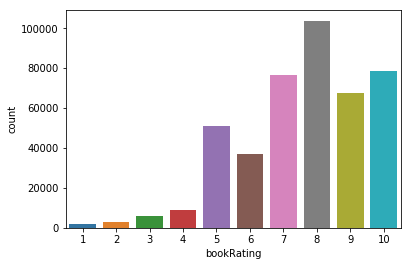

In [78]:
import seaborn as sns
sns.countplot(data=ratings_filtered,x=ratings_filtered.bookRating)

## **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [60]:
ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']
print (ratings.shape)
print(books.shape)

(1149780, 3)
(270309, 5)


In [61]:
count=ratings_filtered['userID'].value_counts()

In [62]:
Rated_Books=count.loc[count.values >99].index

In [63]:
len(Rated_Books)

495

In [64]:
ratings_100=ratings_filtered.loc[ratings_filtered['userID'].isin(Rated_Books)]

In [65]:
print("Users who have reviewed at least 100 Books:",ratings_100.shape)

Users who have reviewed at least 100 Books: (117645, 3)


## Q5 Generating ratings matrix from explicit ratings table

#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [66]:
ratings_100.isnull().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

In [67]:
ratings_100.columns


Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [68]:
ratings_matrix = ratings_100.pivot(index = 'userID',columns = 'ISBN', values = 'bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
ratings_matrix.fillna(0, inplace=True)
print(ratings_matrix.shape)
ratings_matrix.head()

(495, 78487)


ISBN,0375404120,9022906116,0*708880258,0.330241664,0000000000,00000000000,0000000000000,0000000029841,0000000051,0000018030,...,O67174142X,O9088446X,Q380708353,SBN67001026X,UNGRANDHOMMED,X000000000,ZR903CX0003,"\0432534220\""""","\2842053052\""""",Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Q6. Generate the predicted ratings using SVD with no.of singular values to be 50

In [69]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_100[['userID', 'ISBN', 'bookRating']], reader)

In [70]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [71]:
from surprise import SVD
from surprise import accuracy
svd_model = SVD(n_factors=50,biased=False) # Here n_Factors takes the 150 factors from the User * Movies Matrix
svd_model.fit(trainset)
test_pred = svd_model.test(testset)

In [72]:
accuracy.rmse(test_pred)

RMSE: 3.0130


3.0129825458219535

## Take a particular user_id

Lets find the recommendations for user with id 2110
Note: Execute the below cells to get the variables loaded

In [286]:
userID = 2110

# For Generating Recommendations we need to find out which books the user has not Reviewed

## Q7 Get the predicted ratings for userID 2110 and sort them in descending order

In [73]:
#Generating Anti Test Set
New_testset = trainset.build_anti_testset()

In [74]:
New_testset[0][1]

'0761514236'

In [75]:
trainset.to_inner_uid(2110)

342

In [77]:
#instead of predicting the ratings for all the users, we shall be slicing the list for user id 2110.
user2110 =[]
length = len(New_testset)
for i in range(length):
    if New_testset[i][0] == 2110:
        user2110.append(New_testset[i])

In [78]:
# thus we have the list of books for user id 2110 which the user has not rated
user2110[0:5]

[(2110, '2020427850', 7.799768793988644),
 (2110, '0761514236', 7.799768793988644),
 (2110, '0373821727', 7.799768793988644),
 (2110, '0385336489', 7.799768793988644),
 (2110, '0310205050', 7.799768793988644)]

In [79]:
predictions = svd_model.test(user2110)

In [80]:
len(predictions)

62248

In [81]:
#creating the dataframe for user id 2110 and corresding book - estimated rating combination
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [82]:
predictions_df.columns = ["userID","ISBN","est_rating"]
predictions_df.sort_values(by = ["userID","est_rating"],ascending=False,inplace=True)

In [83]:
predictions_df.head()

,userID,ISBN,est_rating
709,2110,0385484518,8.766196
17136,2110,055327094X,8.705637
901,2110,0312195516,8.584679
16774,2110,0451190556,8.309172
1442,2110,0451190521,8.003674


## Q8 Create a dataframe with name user_data containing userID 2110 explicitly interacted books

In [84]:
user_data=ratings_100[ratings_100['userID']==2110]

In [85]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [86]:
len(user_data) 

103

# User has rated a total of 103 Books

## Q9 Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [87]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [88]:
user_full_info = user_data.merge(books,on='ISBN')

In [89]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


#### Q10 Get top 10 recommendations for above given userID from the books not already rated by that user

In [90]:
Recommendations=predictions_df.merge(books,on='ISBN')

In [91]:
Recommendations.head(10)

,userID,ISBN,est_rating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0385484518,8.766196,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday
1,2110,055327094X,8.705637,Qb VII,Leon Uris,1982,Bantam Books
2,2110,0312195516,8.584679,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
3,2110,0451190556,8.309172,The Green Mile: The Bad Death of Eduard Delacr...,Stephen King,1996,Signet Book
4,2110,0451190521,8.003674,The Green Mile: The Mouse on the Mile (Green M...,Stephen King,1996,Signet Book
5,2110,0836218817,7.998102,Unnatural Selections,Gary Larson,1991,Andrews McMeel Publishing
6,2110,0679763309,7.971599,An Unquiet Mind,Kay R. Jamison,1997,Vintage Books USA
7,2110,0380702843,7.866385,The Return of the Indian (Indian in the Cupboard),Lynne Reid Banks,1999,HarperTrophy
8,2110,1592400876,7.849476,"Eats, Shoots &amp; Leaves: The Zero Tolerance ...",Lynne Truss,2004,Gotham Books
9,2110,0345417623,7.799783,Timeline,MICHAEL CRICHTON,2000,Ballantine Books


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

## Q11 Read the Dataset `movies_metadata.csv`

## Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

## Q13  Lets drop the null values in `description` column

## Q14 Keep the first occurance and drop duplicates of each title in column `title`

## Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

## Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

## Q17  Create cosine similarity matrix

## Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

## Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [92]:
jokesdf=pd.read_csv("jokes.csv")

In [93]:
jokesdf.shape

(24983, 101)

In [94]:
jokesdf.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [95]:
ratings=jokesdf.iloc[0:200,1:]

In [96]:
ratings.shape

(200, 100)

In [97]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [98]:
columns=list(range(0,100))

In [99]:
print(columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [100]:
ratings.columns = columns

In [101]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [102]:
ratings=ratings.replace(99.00,0)

In [103]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
sc=StandardScaler()

In [106]:
sc.fit(ratings)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [107]:
ratings_diff = sc.transform(ratings)

In [108]:
#ratings_diff=pd.DataFrame(data=ratings_diff)

In [109]:
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [110]:
import numpy as np
means = ratings_diff.mean(axis=0)

In [111]:
print('JokeId having maximum mean value::',np.argmax(means))

JokeId having maximum mean value:: 53


# Top 10 joke ids

In [112]:
top_10_jokes = means.argsort()[-10:][::-1]

In [113]:
print('Top 10 joke ids ::',top_10_jokes)

Top 10 joke ids :: [53 20 47 49 64 99 83 23 73 13]
